<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bayesian-estimation-equivalent-of-Poisson-regression" data-toc-modified-id="Bayesian-estimation-equivalent-of-Poisson-regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bayesian estimation equivalent of Poisson regression</a></span></li><li><span><a href="#Classic-Poison-regression" data-toc-modified-id="Classic-Poison-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Classic Poison regression</a></span></li><li><span><a href="#Steps-of-Bayesian-data-analysis" data-toc-modified-id="Steps-of-Bayesian-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Steps of Bayesian data analysis</a></span></li><li><span><a href="#Step-1---Identify-the-relevant-data-for-question-under-investigation" data-toc-modified-id="Step-1---Identify-the-relevant-data-for-question-under-investigation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 1 - Identify the relevant data for question under investigation</a></span><ul class="toc-item"><li><span><a href="#Data-overview-and-study-description" data-toc-modified-id="Data-overview-and-study-description-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data overview and study description</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Import data</a></span></li></ul></li><li><span><a href="#Step-2---Defining-the-descriptive-model-\begin{align*}
y_{ik}-&amp;\sim-Normal(\lambda_k)-
\\-\lambda_k-&amp;\sim-halfnormal(0,-100)--
\end{align*}" data-toc-modified-id="Step-2---Defining-the-descriptive-model-\begin{align*}
y_{ik}-&amp;\sim-Normal(\lambda_k)-
\\-\lambda_k-&amp;\sim-halfnormal(0,-100)--
\end{align*}-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Step 2 - Defining the descriptive model <div class="MathJax_Display" style="text-align: center;"></div><script type="math/tex; mode=display" id="MathJax-Element-16">\begin{align*}
y_{ik} &\sim Normal(\lambda_k) 
\\ \lambda_k &\sim halfnormal(0, 100)  
\end{align*}</script></a></span></li><li><span><a href="#Step-3---Specifying-priors" data-toc-modified-id="Step-3---Specifying-priors-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Step 3 - Specifying priors</a></span></li><li><span><a href="#Stan-model" data-toc-modified-id="Stan-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Stan model</a></span></li><li><span><a href="#Fitting-the-model" data-toc-modified-id="Fitting-the-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Fitting the model</a></span></li></ul></div>

In [3]:
# Import data analysis and visualisation packages
import numpy as np
import pandas as pd
import pystan as ps
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import arviz as az

In [4]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# Bayesian estimation equivalent of Poisson regression

The following notebook will provide an example of how to conduct a Bayesian poisson regression 

# Classic Poison regression

Before proceeding it will be useful to quickly decribe poisson regression under the classical statistical framework. Poisson regression is a special case of generalised linear model within the general regression analysis framework. Its primary application is to model count data (dependent variables that can only take positive interger values). 

Poison regression is a generlised linear just as simple linear regression is a generalised linear model. 

##Bayesian inference
<font size = "3"> Following the quick description of the classic Poisson regression above its important to keep in mind that Bayesian inference is derived from the application of Bayes rule $P(\theta \mid y) = \large \frac{P(y \mid \theta) \, P(\theta)}{P(y)}$ and as such while the following description of the Bayesian model is an equivalent to Poisson regression it is fundamentally different, because it uses fully probabilistic modelling and the inferences are not based on sampling distributions.</font>
    
<font size = "1"> For a fuller description see the Practicing Bayesian statistics markdown file within the Github repository.</font>

# Steps of Bayesian data analysis

<font size = "3"> Kruscke (2015) offers a step by step formulation for how to conduct a Bayesian analysis:

1. Identify the relevant data for the question under investigation.

2. Define the descriptive (mathematical) model for the data.

3. Specify the Priors for the model. If a scientific research publication is the goal, the priors must be accepted by a skeptical audience. This can be achieved by using prior predcitve checks to ascertain if the priors are reasonable.

4. Using Bayes rule, estimate the posterior for the model parameters using the likelihood and priors. Then use the posterior to conduct your inference.

5. Conduct model checks. i.e. Posterior predcitive checks.</font> 

<font size = "1">This notebook will follow this approach generally.</font> `m

#  Step 1 - Identify the relevant data for question under investigation

## Data overview and study description

The data and the analysis has been taken from https://drive.google.com/file/d/0Bz-rhZ21ShvOM1cxWUpUNlQ0UlE/view, and stored in the Github repository for these notebooks for ease of import. The dataset is orignally from James et al. (2015). See the original paper here https://journals.sagepub.com/doi/pdf/10.1177/0956797615583071?referrer=&priority=true&module=meter-Links&pgtype=Blogs&contentId=&action=click&contentCollection=meter-links-click&version=meter+at+null&mediaId=

A reality of trauma is that individuals can experience flasbacks which have been termed "Intrusive memories". A form of treatment that has been argued to be effective for suffers of intrusive memories is to use reconsolidation methods. As such, James et al. (2015) wanted to investigate if a video game treament (tetris) could reduce the number of intrusive memories a traumatised indivdual experienced.

The participants with the study were split into four conditions (n=72, with 18 particpants per condition).

1. No-task control: These participants completed a 10-minute music filler task.
2. Reactivation + Tetris: These partipants underwent a reactivation task to (trauma film) to reactivate their traumatic memories, which was then followed by 10 minute filler music task. This was followed by playing tetris for 12 minutes
3. Tetris: this group played tetris for 12 minutes
4. Reactivation only: Participants only watch the trauma film

## Import data

In [106]:
url = "https://raw.githubusercontent.com/ebrlab/Statistical-methods-for-research-workers-bayes-for-psychologists-and-neuroscientists/master/Data/James%20et%20al%202015%20Experiment%202%20Data%20Set.csv"

#Generare apndas data frame with the study data
df = pd.read_csv(url)
df.head(72)

,Condition,Time_of_Day,BDI_II,STAI_T,pre_film_VAS_Sad,pre_film_VAS_Hopeless,pre_film_VAS_Depressed,pre_film_VAS_Fear,pre_film_VAS_Horror,pre_film_VAS_Anxious,...,Day_Zero_Number_of_Intrusions,Days_One_to_Seven_Number_of_Intrusions,Visual_Recognition_Memory_Test,Verbal_Recognition_Memory_Test,Number_of_Provocation_Task_Intrusions,Diary_Compliance,IES_R_Intrusion_subscale,Tetris_Total_Score,Self_Rated_Tetris_Performance,Tetris_Demand_Rating
0,1,2,1,33,0.0,0.0,0.0,0.4,0.3,0.8,...,2,4,15,18,5,9,0.62,9999,9999.0,0
1,1,2,3,27,1.9,0.7,0.5,0.8,0.2,0.2,...,2,3,17,19,4,9,0.62,9999,9999.0,0
2,1,1,10,42,2.2,1.2,0.9,0.2,0.1,0.4,...,5,6,12,21,0,10,0.50,9999,9999.0,0
3,1,1,1,41,1.2,1.0,0.6,5.1,0.4,0.5,...,0,2,16,19,0,8,0.50,9999,9999.0,3
4,1,2,1,27,0.2,0.1,0.0,2.9,0.0,0.7,...,5,3,14,22,10,8,1.00,9999,9999.0,-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,4,2,2,34,0.5,0.0,1.0,2.1,1.5,3.4,...,2,1,15,20,4,7,0.50,9999,9999.0,0
68,4,2,2,28,0.8,0.9,1.0,0.0,0.0,0.0,...,2,4,14,21,6,8,1.50,9999,9999.0,-5
69,4,2,0,23,1.6,0.3,0.5,0.0,0.0,1.3,...,3,4,18,24,7,9,0.50,9999,9999.0,0
70,4,2,4,42,2.2,5.0,2.3,0.0,0.0,0.0,...,12,7,13,17,3,7,0.50,9999,9999.0,-1


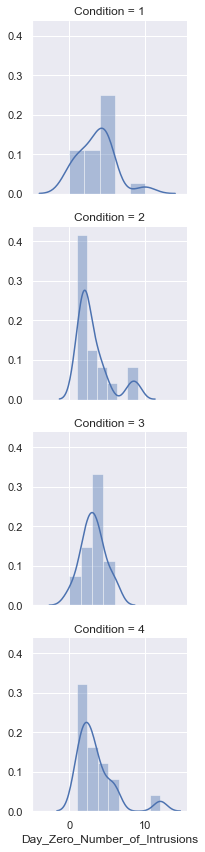

In [7]:
#Set them of seaborn plots for nicer display
sns.set()

#Genrate grd to dspaly th four separate condtions
g= sns.FacetGrid(df, row="Condition");

#Genrate the four hisogram plots for the 4 condtions
g.map(sns.distplot, "Day_Zero_Number_of_Intrusions");

# Step 2 - Defining the descriptive model \begin{align*}
y_{ik} &\sim Normal(\lambda_k) 
\\ \lambda_k &\sim halfnormal(0, 100)  
\end{align*} 



# Step 3 - Specifying priors
To get to the model described above prior preditive checks

# Stan model

In [60]:
Poisson = """

data{

int<lower = 0> N; // Number od data points

int<lower=0> y[N]; // Dependent varaible data

int K; // number of groups

// array of integer vlaues for the indicator variables
int<lower = 1, upper = K> x[N];

real prior_mu;
real prior_sd;

// logically evaluates below to determine if it running Prior predictive checks.
int<lower= 0, upper = 1> onlyprior; 



}

parameters{

vector<lower = 0>[K] lamda;

}

model{

//priors 
lamda ~ normal(prior_mu, prior_sd); // prior on each group

//Likelihood
 if(!onlyprior)
y ~ poisson(lamda[x]);

}

generated quantities{

vector[N] yrep;

for(i in 1:N)
yrep[i] = poisson_rng(lamda[x[i]]);

}

"""

In [61]:
sm = ps.StanModel(model_code=Poisson)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_08d10891ca2b974673b7a5d3d4ed6e3e NOW.


In [65]:
Prior_data = {'N': len(df),
              'y': df["Day_Zero_Number_of_Intrusions"].values,
              'K': max(df["Condition"].values),
              'x':df["Condition"].values,
              'prior_mu':0,
              'prior_sd': 100,
              'onlyprior': 1}

In [66]:
prior_PC = sm.sampling(data = Prior_data, iter = 2000, chains = 4, seed = 1, warmup = 1000)

In [67]:
# Because of python print stament it is easier to extract the results of the prior predictive
# checks into a panda data frame.
summary = prior_PC.summary()
prior_df = pd.DataFrame(summary['summary'], 
                  columns = summary['summary_colnames'], 
                  index = summary['summary_rownames'])

In [78]:
prior_df.head()

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
lamda[1],78.556512,1.112170,60.686870,2.621744,30.155871,65.611608,113.018389,224.028453,2977.469057,0.999808
lamda[2],82.010284,1.151782,60.514919,4.858785,33.503299,69.104278,117.382946,222.640626,2760.476494,1.000959
lamda[3],81.563656,1.272963,61.057149,4.631539,33.222791,69.047608,117.648328,224.756488,2300.601378,1.000438
lamda[4],80.821984,1.184895,58.019530,4.118969,34.053377,69.801435,116.065759,215.469233,2397.665716,1.001173
yrep[1],78.755750,1.123305,61.453895,2.000000,30.000000,66.000000,114.000000,227.000000,2992.977421,0.999801


In [89]:
yrep1 = prior_PC['yrep[1]'].T
yrep1

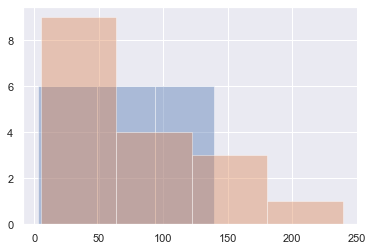

In [105]:
sns.distplot(yrep1[0:18], kde=False);
sns.distplot(yrep1[19:36], kde=False);

# Fitting the model

In [107]:
data = {'N': len(df),
              'y': df["Day_Zero_Number_of_Intrusions"].values,
              'K': max(df["Condition"].values),
              'x':df["Condition"].values,
              'prior_mu':0,
              'prior_sd': 100,
              'onlyprior': 0}

In [108]:
fit = sm.sampling(data = data, iter = 2000, chains = 4, seed = 1, warmup = 1000)

In [109]:
# Because of python print stament it is easier to extract the results of the prior predictive
# checks into a panda data frame.
summary = fit.summary()
fit_df = pd.DataFrame(summary['summary'], 
                  columns = summary['summary_colnames'], 
                  index = summary['summary_rownames'])

In [110]:
fit_df

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
lamda[1],3.610877,0.007259,0.460155,2.749477,3.295199,3.596396,3.916488,4.546426,4018.125096,0.999216
lamda[2],3.153723,0.006267,0.401747,2.425082,2.873907,3.137490,3.414043,3.993634,4109.514770,0.999902
lamda[3],3.227404,0.006485,0.430286,2.434931,2.928383,3.213327,3.514657,4.100785,4402.855179,0.999848
lamda[4],3.495826,0.006607,0.438783,2.718404,3.193896,3.475542,3.773070,4.404937,4411.106086,1.000440
yrep[1],3.546500,0.030219,1.929577,0.000000,2.000000,3.000000,5.000000,8.000000,4077.341853,1.000800
...,...,...,...,...,...,...,...,...,...,...
yrep[69],3.526000,0.029515,1.891354,0.000000,2.000000,3.000000,5.000000,8.000000,4106.507755,1.002371
yrep[70],3.538500,0.030940,1.940994,0.000000,2.000000,3.000000,5.000000,8.000000,3935.600638,1.000488
yrep[71],3.510750,0.031409,1.942892,0.000000,2.000000,3.000000,5.000000,8.000000,3826.288337,1.000034
yrep[72],3.466000,0.031410,1.928153,0.000000,2.000000,3.000000,5.000000,8.000000,3768.347581,1.000197
